In [12]:
from data_pipeline import *
from utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
expr, gene_symbols, sample_names = load_data()
nb_samples, nb_genes = expr.shape

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
4297 genes not in gene subset. Selecting 1076 genes ...


# E. coli intensities histogram

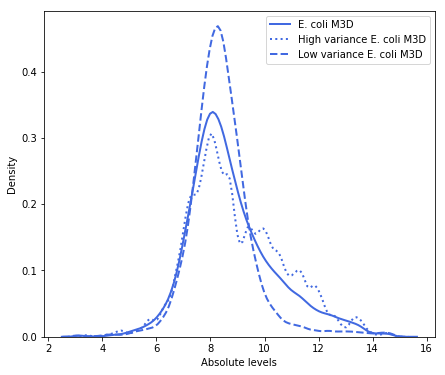

In [9]:
plt.figure(figsize=(7, 6))
plot_intensities(expr);

# E. coli gene ranges histogram

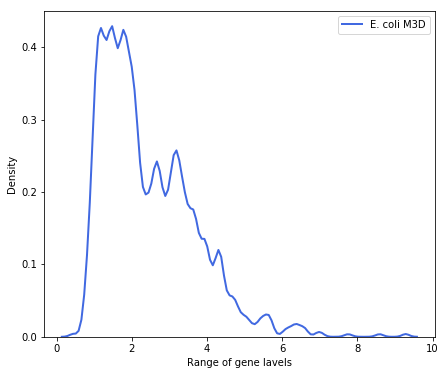

In [10]:
plt.figure(figsize=(7, 6))
plot_gene_ranges(expr);

# E. coli cluster map

1.1162639282449418
-1.0782870320621933
907
[[-5.95834614e-02 -8.83173589e-02  2.26557660e-02 ... -1.21970881e-01
  -1.83475249e-01  5.72356966e-02]
 [-1.85081909e-01 -1.55373618e-01 -2.76399359e-02 ... -2.19921418e-01
  -2.04624626e-01  4.40796067e-02]
 [-2.01747988e-01 -1.07413957e-01 -5.12096662e-04 ... -1.76174864e-02
  -1.73017784e-01  4.18154013e-03]
 ...
 [ 7.85585504e-01  2.79763296e-01 -4.52629417e-01 ... -3.95940884e-03
  -7.46003820e-02 -7.73187952e-01]
 [ 7.85585504e-01  5.04011384e-01 -2.84118416e-01 ... -3.19962269e-01
  -2.30222281e-01 -7.73187952e-01]
 [ 6.98435781e-01 -4.48231633e-02 -7.05555918e-01 ... -5.37131790e-01
  -4.99463467e-01 -7.73187952e-01]]


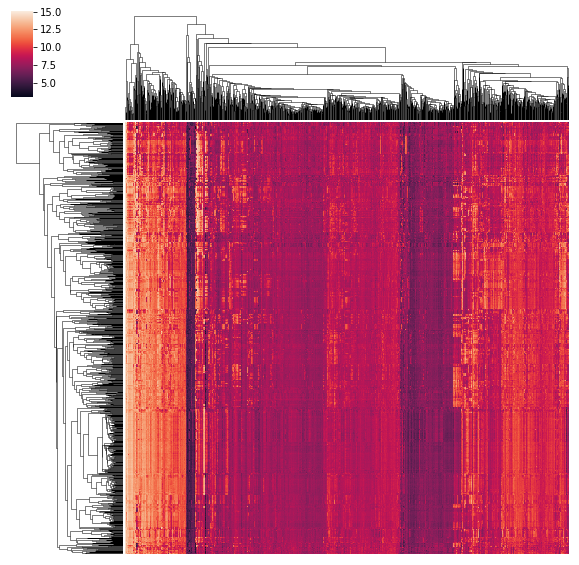

In [14]:
expr_o = clip_outliers(expr, std_clip=3)
kappa=4
mean = np.mean(expr_o, axis=0)
std = np.std(expr_o, axis=0)
expr_norm = (expr_o - mean) / (kappa*std)
print(expr_norm.max())
print(expr_norm.min())

g = sns.clustermap(expr_o, xticklabels=False, yticklabels=False);
print(len(g.dendrogram_row.reordered_ind))
print(expr_norm)

0.7652377975524702
-0.763325801147228
680
[[-0.10270188 -0.18637928 -0.00649296 ... -0.16343885 -0.08706647
   0.475993  ]
 [-0.16820146 -0.0105566  -0.12488185 ...  0.07970917 -0.33393867
  -0.02065527]
 [-0.05698625  0.35554952 -0.01803002 ...  0.02993661 -0.1382436
   0.13691688]
 ...
 [-0.17207287 -0.48414475 -0.12884975 ... -0.05870243  0.43435887
  -0.30765016]
 [ 0.42054857  0.3745002   0.22582741 ...  0.15581845  0.02537437
  -0.11651195]
 [ 0.17661919  0.44850615  0.11230943 ...  0.2022556   0.07944087
  -0.03811766]]


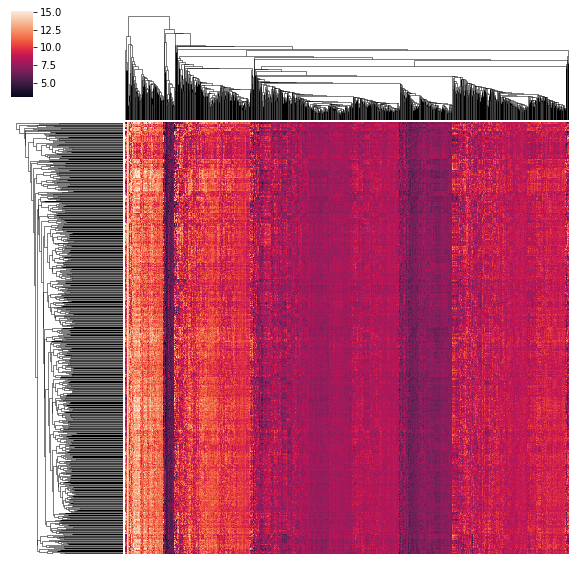

In [15]:
root_gene = 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf

### GAN data ###
synthetic_name = 'EColi_n{}_r{}_e{}_d{}'.format(len(gene_symbols), root_gene, minimum_evidence, max_depth)
gan_expr, gs = load_synthetic(synthetic_name)
assert (np.array(gene_symbols) == np.array(gs)).all()

expr_o = clip_outliers(gan_expr, std_clip=3)
kappa=4
mean = np.mean(expr_o, axis=0)
std = np.std(expr_o, axis=0)
expr_norm = (expr_o - mean) / (kappa*std)
print(expr_norm.max())
print(expr_norm.min())

g = sns.clustermap(expr_o, xticklabels=False, yticklabels=False);
print(len(g.dendrogram_row.reordered_ind))
print(expr_norm)

# E. coli TF-TG and TG-TG correlations

In [12]:
tf_tg_corr, tg_tg_corr = compute_tf_tg_corrs(expr, gene_symbols)
back_corr = correlations_list(expr, expr)

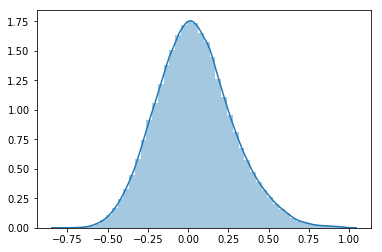

In [13]:
sns.distplot(back_corr);

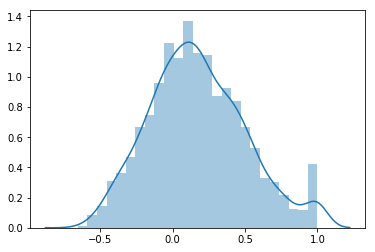

In [14]:
sns.distplot(tf_tg_corr);

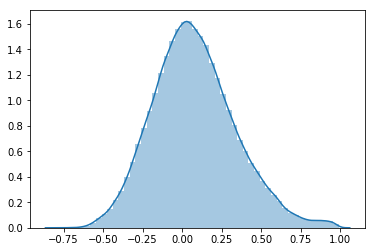

In [15]:
sns.distplot(tg_tg_corr);

# E. coli TF-TG histogram

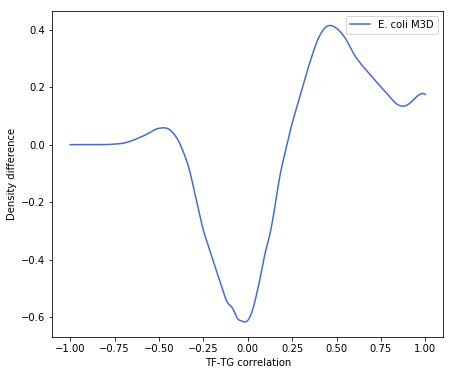

In [16]:
plt.figure(figsize=(7, 6))
plot_difference_histogram(tf_tg_corr, back_corr, 'TF-TG correlation');

# E. coli TG-TG histogram

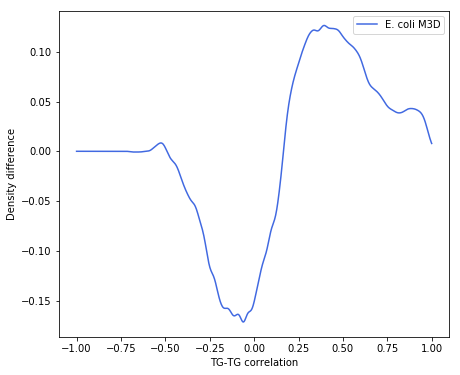

In [17]:
plt.figure(figsize=(7, 6))
plot_difference_histogram(tg_tg_corr, back_corr, 'TG-TG correlation');

# E. coli TF activity histogram

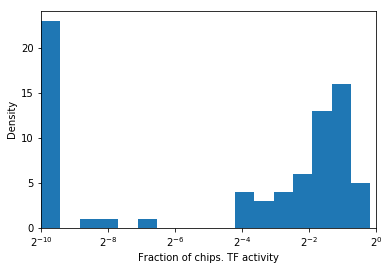

In [18]:
# CRP
plot_tf_activity_histogram(expr, gene_symbols)

# Quantitative analysis

In [5]:
# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = expr[train_idxs, :]
expr_test = expr[test_idxs, :]

# Compute scores
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
scores = compute_scores(expr_test, expr_train, gene_symbols)
print('Scores')
for name, score in zip(score_names, scores):
    print('{}: {}'.format(name, score))

Scores
S_dist: 0.9109078771438015
S_dend: 0.5197255060786521
S_sdcc: 0.0002194862631583081
S_tftg: 0.9143066268198939
S_tgtg: 0.9467566219081305
S_tfac: 0.9715033117806467
